In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as TTS ,cross_val_score as CSV
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

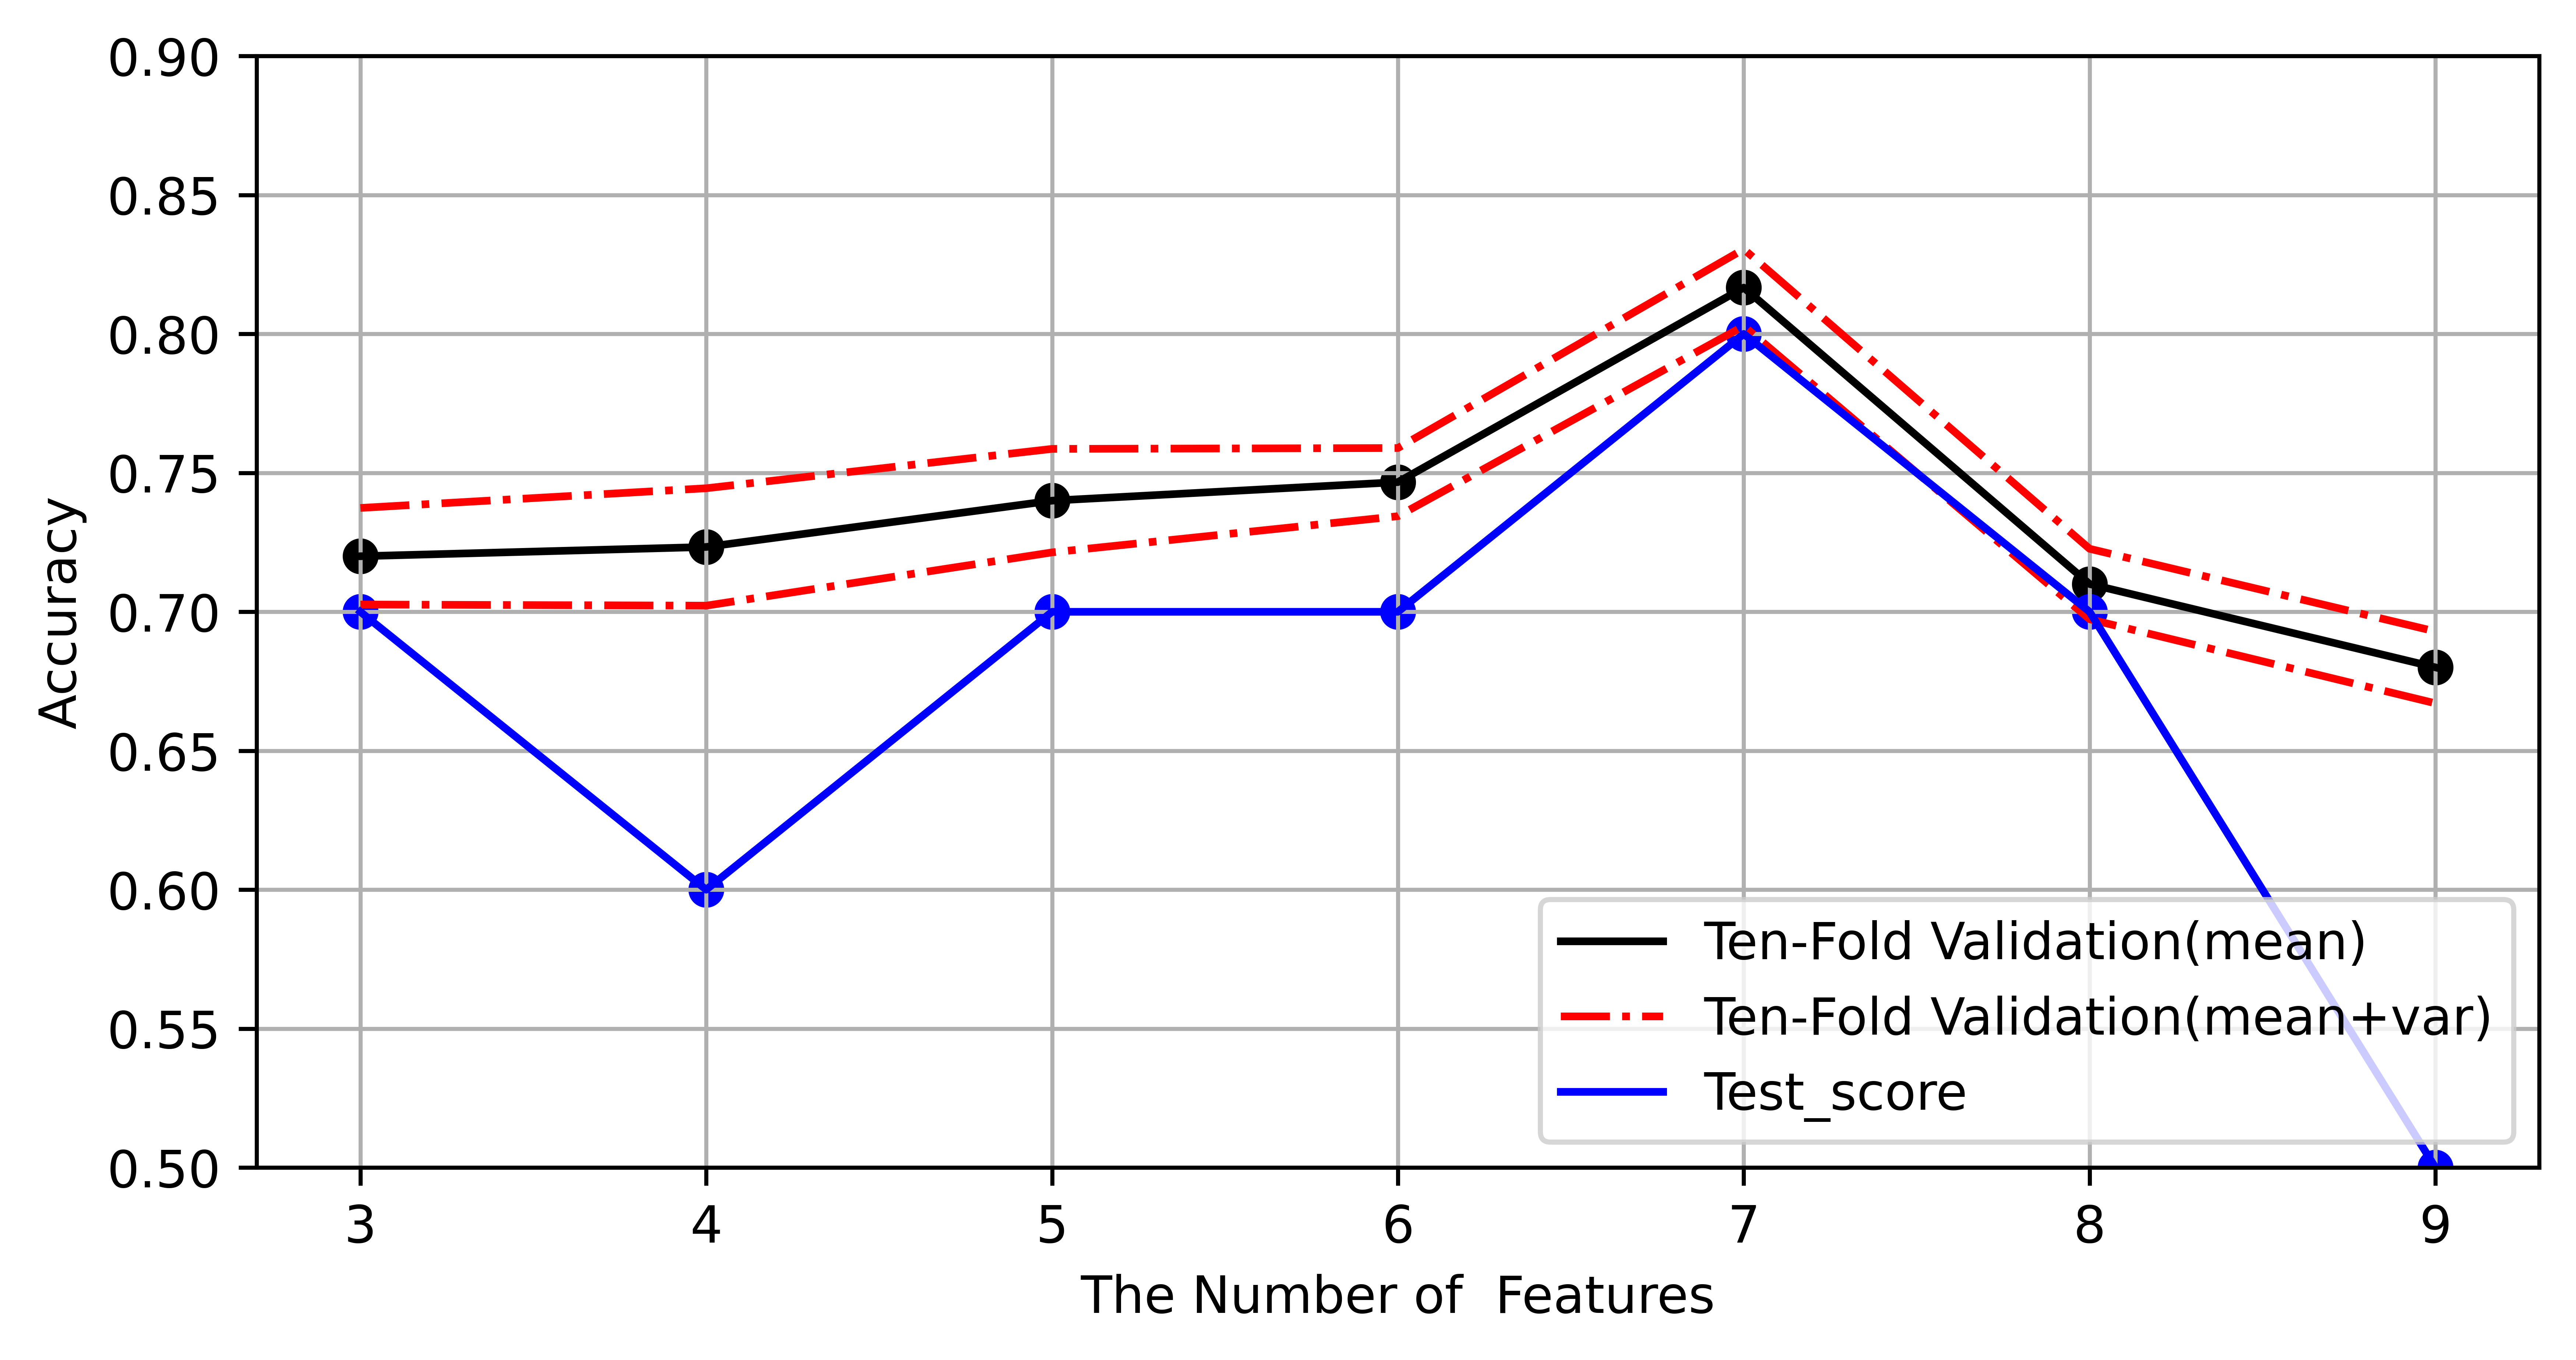

In [4]:
df =pd.read_csv('GDM_data.csv')

X = df.iloc[:,1:10]
y = df.iloc[:,11]
X_train,X_test,y_train,y_test = TTS (
    X,y,test_size = 0.15,random_state = 9,stratify = y)

mean_=[]
var_ =[]
ts_ = []
for i in range(4,11):
    X = df.iloc[:,1:i]
    y = df.iloc[:,11]
    X_train,X_test,y_train,y_test = TTS (X,y,test_size = 0.15,random_state = 9,stratify = y)
    GBC = GradientBoostingClassifier(learning_rate=0.3, max_depth=2, max_features=0.2, min_samples_leaf=8, 
                                  min_samples_split=6, n_estimators=20, subsample=0.6,random_state=16)
    GBC.fit(X_train, y_train)
    ts = GBC.score(X_test,y_test)
    CSV_ = CSV(GBC,X_train,y_train,cv=10)
    mean = CSV_.mean()
    var = CSV_.var()
    mean_.append(mean)
    var_.append(var)
    ts_.append(ts)
axis = range(3,10)
mean_ = np.array(mean_)
var_ = np.array(var_)
ts_ = np.array(ts_)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4), dpi=1000)
plt.plot(axis,mean_,c='black',label = 'Ten-Fold Validation(mean)')
plt.scatter(axis,mean_,c='black')
plt.plot(axis,mean_+ var_,c= 'red',linestyle = '-.',label = 'Ten-Fold Validation(mean+var)')
plt.plot(axis,mean_- var_,c= 'red',linestyle = '-.')
plt.plot(axis,ts_ ,c = 'blue',label = 'Test_score')
plt.scatter(axis,ts_,c='blue')
plt.xlabel('The Number of  Features')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc=4)
plt.ylim(0.5,0.9)
plt.show()

[0.72       0.72333333 0.74       0.74666667 0.81666667 0.71
 0.68      ]
